# Ungraded Lab: Transfer Learning

In [1]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
#     -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

In [33]:
local_weight_file='datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model=InceptionV3(input_shape=(150,150,3),
                              include_top=False,
                              weights=None
                             )
pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
    layer.trainable=False

In [34]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [35]:
last_layer=pre_trained_model.get_layer('mixed7')
print('last layer output shape:',last_layer.output_shape)

last layer output shape: (None, 7, 7, 768)


In [9]:
last_output=last_layer.output

# Add dense layers for your classifier

In [10]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x=layers.Flatten()(last_output)
x=layers.Dense(1024, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model=Model(pre_trained_model.input,x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [11]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

# prepare the dataset

In [12]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
base_dir='datasets/cats_and_dogs_filtered/'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'validation')
validation_cats_dir=os.path.join(validation_dir,'validation')

In [29]:
train_datagen=ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150)
)

Found 2000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# train the model

In [38]:
# train the model
history=model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_steps=10,
    verbose=1
)

Epoch 1/20
50/50 [==============================] - 6s 109ms/step - loss: 0.0515 - accuracy: 0.9810 - val_loss: 0.0085 - val_accuracy: 0.9950
Epoch 2/20
50/50 [==============================] - 6s 110ms/step - loss: 0.0710 - accuracy: 0.9740 - val_loss: 0.0209 - val_accuracy: 0.9950
Epoch 3/20
50/50 [==============================] - 6s 112ms/step - loss: 0.0751 - accuracy: 0.9780 - val_loss: 0.0052 - val_accuracy: 0.9950
Epoch 4/20
50/50 [==============================] - 5s 107ms/step - loss: 0.0448 - accuracy: 0.9840 - val_loss: 0.0371 - val_accuracy: 0.9900
Epoch 5/20
50/50 [==============================] - 5s 108ms/step - loss: 0.0649 - accuracy: 0.9770 - val_loss: 0.0089 - val_accuracy: 0.9950
Epoch 6/20
50/50 [==============================] - 5s 107ms/step - loss: 0.1020 - accuracy: 0.9760 - val_loss: 0.0188 - val_accuracy: 0.9950
Epoch 7/20
50/50 [==============================] - 5s 109ms/step - loss: 0.0660 - accuracy: 0.9790 - val_loss: 0.0423 - val_accuracy: 0.9950
Epoch 

# Evaluate the results

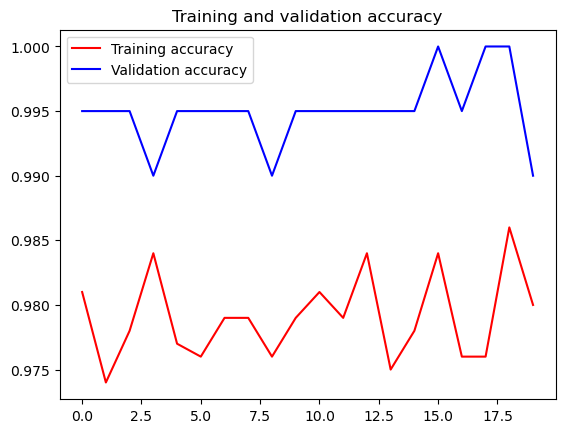

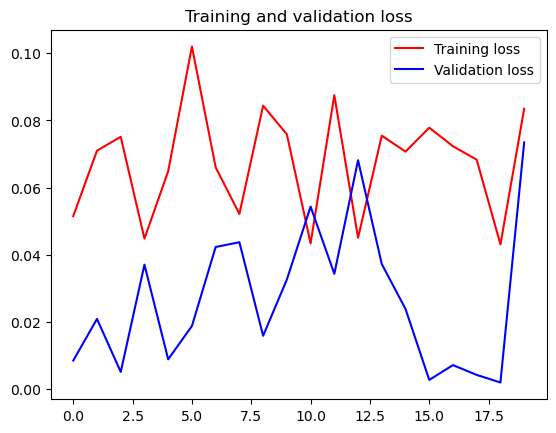

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
epochs2=range(len(val_acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs2,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()